# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
sns.set()

## Get the Data

Set index_col=0 to use the first column as the index. You do this becase an index was included in the first column

In [38]:
df = pd.read_csv('Classified Data', index_col=0)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [79]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [41]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

# Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

### Create the X data frame by drop the dependent variable from the dataframe since we want to use all of the features

In [44]:
X = df.drop('TARGET CLASS', axis=1)
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [45]:
y = df['TARGET CLASS']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scaling the data for X_train

* **First you should ONLY fit the scaler with your X_train data. Then train your knn-model with scaled X_train set:**
* **scaler.fit(X_train)**
* **X_train_scaled = scaler.transform(X_train)**
* **knn.fit(X_train_scaled, y_train)** 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

### Fitting the scaler computes the mean and std based on the X_train data that will to be used for later during the transform algorithm.

In [48]:
scaler.fit(X_train)

StandardScaler()

### Creating new data object where the fitted scaler values tranform the X_train data

In [49]:
X_train_scaled = scaler.transform(X_train)

### The transformation turned our X_train_scaled into an array and this step below simply turns it back to a dataframe and assigns the original index from X_train

In [50]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
77,0.680903,0.676467,1.135737,-1.879111,-0.070955,-1.244820,-0.970032,0.357973,0.283821,-1.282102
602,-1.324643,0.164148,0.285063,2.501633,-1.319440,2.035058,-1.397539,0.895521,-1.883192,-1.697797
875,-0.775261,-1.218170,-0.145479,-0.242463,-0.195497,-0.649687,-1.510517,-1.173630,1.523751,-1.038007
151,-0.086733,0.695379,1.550391,0.226545,-0.343628,1.320096,-0.662854,0.067508,-0.304316,2.091938
485,-0.937717,0.375264,0.084694,-0.297376,-2.231966,-1.488096,-0.056901,0.099036,-0.062481,0.434174
...,...,...,...,...,...,...,...,...,...,...
690,-0.797357,-1.333164,-1.011571,0.700401,0.288361,-0.601529,-1.909970,-0.915623,0.967838,-0.684184
835,-0.008478,-0.040370,1.198569,-0.363384,1.768553,0.804276,1.626558,-1.060277,-0.851966,1.104380
836,-0.200810,-0.208988,-0.948915,-1.153887,-1.400562,0.830915,0.000252,-1.755938,-0.492966,0.031395
323,-0.407044,-0.863652,-0.024903,-1.176444,1.934553,0.737658,-0.583231,-0.618988,0.193153,0.475006


## Creating and fitting the KNN model

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

In [53]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

* **To test the model with X_test set you should scale/transform test data with your scaler that was fitted with ONLY X_train data:**

* **X_test_scaled = scaler.transform(X_test)**

* **y_pred = knn.predict(X_test_scaled)**

In [54]:
X_test_scaled = scaler.transform(X_test)

### Returning the transformed scaled X_test_scaled back to a dataframe and returing the original index from X_test

In [55]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_scaled

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
842,-0.473282,-1.010882,1.071068,1.473238,-0.173247,-1.012221,-1.218990,0.031977,2.247561,-1.047598
145,-0.983229,1.036905,0.679780,-0.908060,-0.770865,-0.199448,-0.945677,1.780043,-0.711796,-1.105575
416,-1.352009,0.082610,-0.530327,0.504191,-0.026992,-0.014268,1.378334,0.802663,0.279056,1.233601
969,-1.103727,1.387830,1.406795,-0.286512,1.703109,-0.020860,-0.578251,-0.540605,0.426867,-0.094218
9,-0.602493,-2.398887,0.225211,1.164881,1.631808,-0.241587,0.953100,-1.656557,1.304372,-1.923177
...,...,...,...,...,...,...,...,...,...,...
634,-0.096502,1.100079,1.576561,0.237193,0.642012,1.723062,-1.031547,1.319698,-1.527070,-0.023943
654,-0.105448,0.538881,1.775513,-1.746271,-0.650140,-1.536389,0.373382,0.388779,-1.371362,-1.648780
553,1.459201,-1.586670,2.516515,0.700750,-1.804640,0.310768,0.822461,-1.530455,-0.755544,-0.133992
149,0.928648,-0.294597,0.252542,-0.883184,0.803807,1.020811,-0.662831,-0.901080,-1.306538,1.472297


In [63]:
y_pred = knn.predict(X_test_scaled)

C:\Users\JB\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Predictions and Evaluations

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [67]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[137  15]
 [ 14 134]]


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       152
           1       0.90      0.91      0.90       148

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



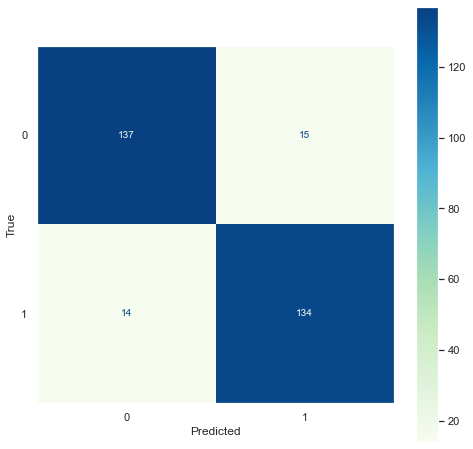

In [71]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='GnBu', ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True', autoscale_on=True)
plt.grid(visible=None)

# Optimizing for a better K Value

### This For Loop iterates throug a range of values you set.  Suring this process, the KNN model is using different K values.  The error between the y_pred_i verses the y_test data is logged in a list.  This list will be plotted on a graph to see which K value gave the lowest error.

In [72]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    y_pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(y_pred_i != y_test))
#     the error_rate takes the mean of all the values of y_pred_i that are not equal to y_test.
# 

C:\Users\JB\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\JB\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

C:\Users\JB\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\JB\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

C:\Users\JB\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\JB\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

Text(0, 0.5, 'Error Rate')

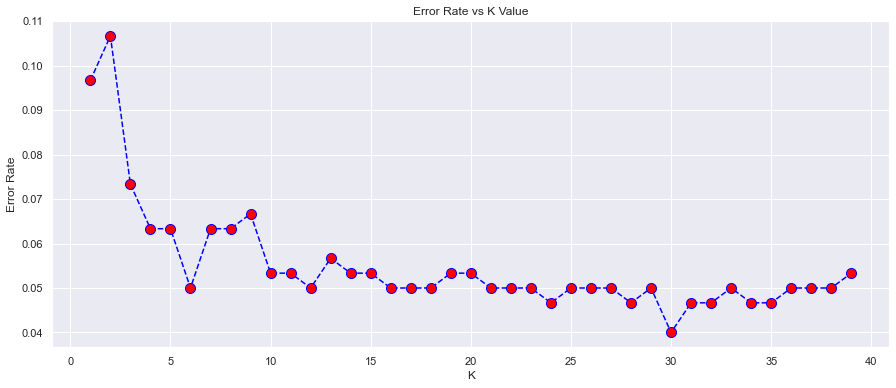

In [75]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Choose a new n_neighbors K value based off the error rates and re-run the algorithms 

[[143   9]
 [  6 142]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       152
           1       0.94      0.96      0.95       148

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



C:\Users\JB\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


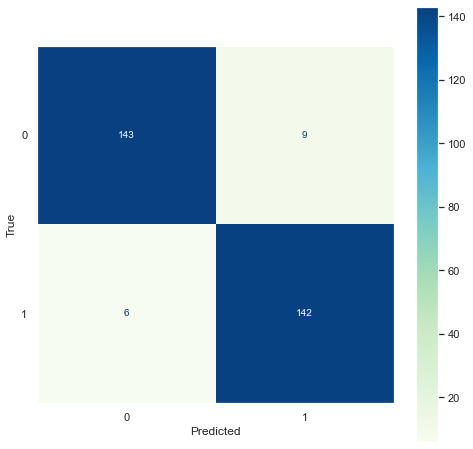

In [76]:
# new K value here
knn = KNeighborsClassifier(n_neighbors=17)

# re-running the new KNN Classifier
knn.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
y_pred = knn.predict(X_test_scaled)


# evaluating the new model 
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='GnBu', ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True', autoscale_on=True)
plt.grid(visible=None)

## Comparing another model with a different K value

[[142  10]
 [  4 144]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.94      0.97      0.95       148

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



C:\Users\JB\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


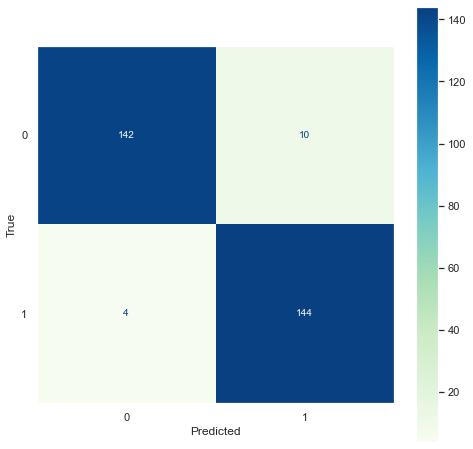

In [83]:
# new K value here
knn = KNeighborsClassifier(n_neighbors=31)

# re-running the new KNN Classifier
knn.fit(X_train_scaled,y_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
y_pred = knn.predict(X_test_scaled)


# evaluating the new model 
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='GnBu', ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True', autoscale_on=True)
plt.grid(visible=None)